# Various sequential tests 2

In [1]:
# import libraries
import math
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

## 1) Tests of variance of normal distribution

The goal is now to test

H0: $\sigma^2=\sigma^2_0$

against

H1: $\sigma^2=\sigma^2_1$.

First, we assume our random sample to have been drawn from N $(\mu,\sigma^2)$, where $\mu$ is known in prior.

In [3]:
def testN1( ha, hb, s, mu, sigma, n = 1, verbose = False ):
    counter = 1
    x = np.random.normal( mu, math.sqrt(sigma), size = n )
    while hb + (n*counter)*s < sum( (x-mu)**2 ) and sum( (x-mu)**2 ) < ha + (n*counter)*s:
        counter += 1
        x = np.append( x, np.random.normal( mu, math.sqrt(sigma), size = n ) ) # extend the sample
    if verbose:
        print( 'data = \n', np.round( x, decimals = 3 ).reshape( -1, n ) )
        print( counter-1, 'sample extensions required' )
    if sum( (x-mu)**2 ) < hb + (n*counter)*s: return False
    else: return True

In [5]:
alpha = 0.05
beta = 0.05

mu = 0
sigma = 4

sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( sigma0**(-2) - sigma1**(-2) )
hb = 2*b / ( sigma0**(-2) - sigma1**(-2) )
s = 2*math.log( sigma1/sigma0) / ( sigma0**(-2) - sigma1**(-2) )

n = 5

print( testN1( ha, hb, s, mu, sigma, n = 5, verbose = True ) )

data = 
 [[-0.405 -2.28   1.537 -2.193 -0.764]
 [ 0.487  2.333 -3.443  1.378  0.709]
 [ 0.747 -1.821  0.348 -1.23   1.651]
 [ 0.026 -0.732 -6.227  2.024  2.969]]
3 sample extensions required
True


It is however not necessary to know $\mu$ in advance. Just run the following test and see yourself.


In [6]:
def testN2( ha, hb, s, mu, sigma, n = 1, verbose = False ):
    counter = 1
    x = np.random.normal( mu, math.sqrt(sigma), size = n )
    while hb + (n*counter)*s < sum( ( x - np.mean(x) )**2 ) and sum( ( x - np.mean(x) )**2 ) < ha + (n*counter)*s:
        counter += 1
        x = np.append( x, np.random.normal( mu, math.sqrt(sigma), size = n ) ) # extend the sample
    if verbose:
        print( 'data = \n', np.round( x, decimals = 3 ) )
        print( counter-1, 'sample extensions required' )
    if sum( ( x - np.mean(x) )**2 ) < hb + (n*counter)*s: return False
    else: return True

In [15]:
alpha = 0.05
beta = 0.05

sigma = 4

sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( sigma0**(-2) - sigma1**(-2) )
hb = 2*b / ( sigma0**(-2) - sigma1**(-2) )
s = 2*math.log( sigma1/sigma0) / ( sigma0**(-2) - sigma1**(-2) )

mu = np.round( np.random.uniform( 0.0, 100.0, 1), decimals = 0 ) # so that mu is truly unknown but not too exotic
print( testN2( ha, hb, s, mu, sigma, n = 5, verbose = True ) )
print( 'True mu was mu =', mu)

data = 
 [[93.39  90.235 88.855 87.971 90.38 ]
 [88.12  89.911 90.279 93.032 95.241]]
1 sample extensions required
True
True mu was mu = [90.]


Let's, examine the mean size of the sample each tests needs to decide.

We run the tests TODO times for a sequence of values $\sigma_1^2$ and see how large samples were required on average for the tests to decide.

Operational characteristics may be of interest as well.

Let's simulate them too.

In [ ]:
N_tests = 100
arr_L1 = np.empty( N_tests )

for i in range( 1000 ):
   arr_res1 = np.array( [ testN1( ha, hb, s, mu, sigma ) for _ in range( N_tests ) ] )
   arr_L1[ i ] = np.sum( arr_res1 ) / N_tests
   arr_res2 = np.array( [ testN2( ha, hb, s, mu, sigma ) for _ in range( N_tests ) ] )
   arr_L2[ i ] = np.sum( arr_res2 ) / N_tests

Finally, compare the tests head-to-head. Both tests run TODO times.

In the first scenario, the tests are not supposed to reject $H_0$.

Precision: [0.9936 0.9987]
Computation time: [0.45952511 1.24929476]


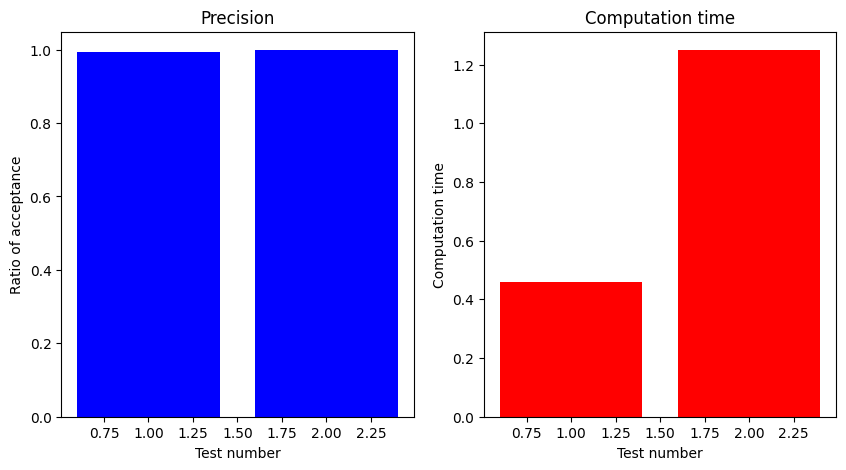

In [17]:
import time

N_tests = 10000

alpha = 0.05
beta = 0.05

mu1 = 0
mu2 = np.random.uniform( 0.0, 1.0, 1 )
sigma = 1 # rejection NOT expected

sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( sigma0**(-2) - sigma1**(-2) )
hb = 2*b / ( sigma0**(-2) - sigma1**(-2) )
s = 2*math.log( sigma1/sigma0) / ( sigma0**(-2) - sigma1**(-2) )

start_t1 = time.time()
arr_res1 = np.array( [ testN1( ha, hb, s, mu1, sigma ) for _ in range( N_tests ) ] )
start_t2 = time.time()
arr_res2 = np.array( [ testN2( ha, hb, s, mu2, sigma ) for _ in range( N_tests ) ] )
end_t = time.time()

y1 = ( N_tests - np.sum( arr_res1 ) ) / N_tests
y2 = ( N_tests - np.sum( arr_res2 ) ) / N_tests

arr_x = np.array( [ 1, 2 ] )
arr_y = np.array( [ y1, y2 ] )
arr_t = np.array( [
    start_t2 - start_t1,
    end_t - start_t2
] )

print( 'Precision:', arr_y )
print( 'Computation time:', arr_t )


fig, axs = plt.subplots( 1, 2, figsize=(10, 5) )

axs[0].bar( arr_x, arr_y, color='blue' )
axs[0].set_title( 'Precision' )
axs[0].set_xlabel( 'Test number' )
axs[0].set_ylabel( 'Ratio of acceptance' )

axs[1].bar( arr_x, arr_t, color='red' )
axs[1].set_title( 'Computation time' )
axs[1].set_xlabel( 'Test number' )
axs[1].set_ylabel( 'Computation time' )

plt.show()

We can do a similar thing in a world where the tests should reject.

Precision: [0.3862 0.5662]
Computation time: [0.60538387 2.018507  ]


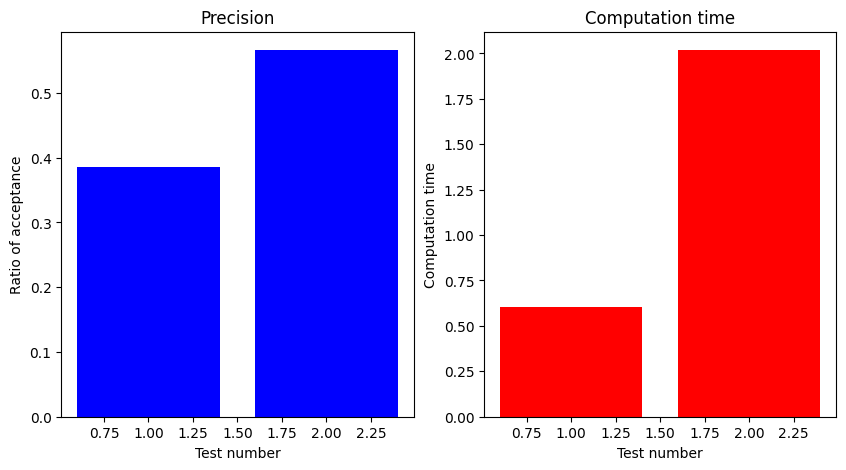

In [18]:
N_tests = 10000

alpha = 0.05
beta = 0.05

mu1 = 0
mu2 = np.random.uniform( 0.0, 1.0, 1 )
sigma = 4 # rejection is expected now

sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( sigma0**(-2) - sigma1**(-2) )
hb = 2*b / ( sigma0**(-2) - sigma1**(-2) )
s = 2*math.log( sigma1/sigma0) / ( sigma0**(-2) - sigma1**(-2) )

start_t1 = time.time()
arr_res1 = np.array( [ testN1( ha, hb, s, mu1, sigma ) for _ in range( N_tests ) ] )
start_t2 = time.time()
arr_res2 = np.array( [ testN2( ha, hb, s, mu2, sigma ) for _ in range( N_tests ) ] )
end_t = time.time()

y1 = ( N_tests - np.sum( arr_res1 ) ) / N_tests
y2 = ( N_tests - np.sum( arr_res2 ) ) / N_tests

arr_x = np.array( [ 1, 2 ] )
arr_y = np.array( [ y1, y2 ] )
arr_t = np.array( [
    start_t2 - start_t1,
    end_t - start_t2
] )

print( 'Precision:', arr_y )
print( 'Computation time:', arr_t )


fig, axs = plt.subplots( 1, 2, figsize=(10, 5) )

axs[0].bar( arr_x, arr_y, color='blue' )
axs[0].set_title( 'Precision' )
axs[0].set_xlabel( 'Test number' )
axs[0].set_ylabel( 'Ratio of acceptance' )

axs[1].bar( arr_x, arr_t, color='red' )
axs[1].set_title( 'Computation time' )
axs[1].set_xlabel( 'Test number' )
axs[1].set_ylabel( 'Computation time' )

plt.show()